In [1]:
import yaml
import netCDF4 as nc
import numpy as np
from utils.read_data import *
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from utils.ensemble_forecasting import get_distribution_stats
from metrics.metrics_trajectory import *
from utils.read_data import *
from utils.param_alpha import get_alpha, get_complex_alpha, compute_alpha_whole_trajectory,compute_alpha_matrix, get_alpha_averaged, update_alpha_GD
from models.linear_model import u_drift_linear, u_drift_linear_complex, u_drift_linear_matrix
from utils.RK4 import RK4_step, compute_position

In [5]:
with open('configs/trace_july2014.yml', 'r') as f:
    config = yaml.safe_load(f)

# Get interpolated initial data
u10_interpolation, v10_interpolation = wind_interpolated(config['PATH_WIND'])
water_u_interpolation, water_v_interpolation = water_interpolated(config['PATH_WATER'])

In [6]:
pos_1, time1 = get_initial_position(config['PATH_DRIFT']) 
true_lon, true_lat, true_time = get_true_drift_positions(config['PATH_DRIFT'])
true_lon_extrapolated,true_lat_extrapolated = get_extrapolated_true_position(config['PATH_DRIFT'],1000)

alpha = update_alpha_GD(config['PATH_DRIFT'], water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation,alpha = 0.03, theta = 0.349066,  step=0.1, npoints=3)

u_drift = u_drift_linear_matrix(alpha, u10_interpolation, v10_interpolation,water_u_interpolation,water_v_interpolation)

longitudes, latitudes, time_final = compute_position(u_drift, pos_1, time1,1,1000)

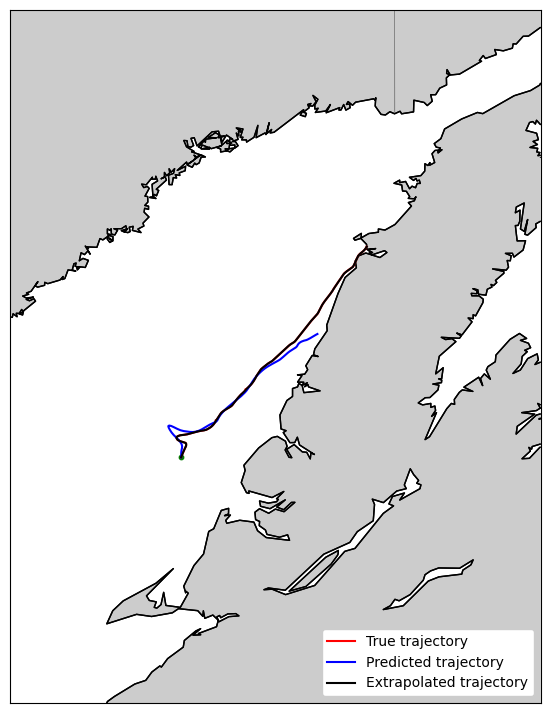

In [7]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -65, urcrnrlon = -59, resolution = 'i') #oct2014

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()


# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='r', label='True trajectory')
m.scatter(true_lon[0],true_lat[0], latlon=True,s=10,color='g',marker ='o',alpha=1)
m.plot(longitudes,latitudes,latlon=True,linewidth=1.5,color='b', label='Predicted trajectory')
m.plot(true_lon_extrapolated,true_lat_extrapolated,latlon=True,linewidth=1.5,color='k', label='Extrapolated trajectory')


plt.legend(loc = 'lower right',framealpha=1)
plt.show()


## Test of the metrics for trajectory

In [13]:
from metrics.metrics_trajectory import *

ssc = skill_score(true_lon_extrapolated[:130],true_lat_extrapolated[:130], longitudes[:130], latitudes[:130])
ssc

step 0
sum ds 0.0
lenght traj 0.0
sum dl 0.0
step 1
sum ds 0.683311330462116
lenght traj 2.077669565703013
sum dl 2.077669565703013
step 2
sum ds 2.119391131495151
lenght traj 4.13008627130696
sum dl 6.207755837009973
step 3
sum ds 4.434441479649964
lenght traj 6.274444807266586
sum dl 12.48220064427656
step 4
sum ds 7.12202180567782
lenght traj 7.83190155615972
sum dl 20.31410220043628
step 5
sum ds 9.760289219463564
lenght traj 9.05143559707118
sum dl 29.36553779750746
step 6
sum ds 12.097315410076735
lenght traj 9.7939934389344
sum dl 39.159531236441865
step 7
sum ds 14.086633787465724
lenght traj 10.742295284536048
sum dl 49.90182652097791
step 8
sum ds 16.36394703632505
lenght traj 11.852894930741282
sum dl 61.75472145171919
step 9
sum ds 19.368940478954144
lenght traj 13.156615348545586
sum dl 74.91133680026478
step 10
sum ds 23.29273119205128
lenght traj 14.46491320587798
sum dl 89.37625000614275
step 11
sum ds 28.163942283210098
lenght traj 15.554959774817192
sum dl 104.9312097

0.7780527695751545

In [7]:
true_lat_extrapolated

array([48.0104    , 48.0104    , 48.01071041, ..., 48.00329   ,
       48.00329   , 48.00329   ])

## Test of the metrics for probability distribution

In [3]:
from metrics.metrics_probabilities import *

dM = mahalanobis_distance(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation, max_hours=10,step_hours = 1)

Trajectory stopped after  5  hours, Nan values
Trajectory stopped after  6  hours, Nan values
Trajectory stopped after  7  hours, Nan values
Trajectory stopped after  5  hours, Nan values
Trajectory stopped after  6  hours, Nan values
Trajectory stopped after  5  hours, Nan values
Trajectory stopped after  7  hours, Nan values
Trajectory stopped after  8  hours, Nan values
Trajectory stopped after  8  hours, Nan values
Trajectory stopped after  6  hours, Nan values
Trajectory stopped after  7  hours, Nan values
Trajectory stopped after  5  hours, Nan values
Trajectory stopped after  8  hours, Nan values
Trajectory stopped after  7  hours, Nan values
Trajectory stopped after  6  hours, Nan values
Trajectory stopped after  8  hours, Nan values
Trajectory stopped after  6  hours, Nan values


In [4]:
dM

4.9896678103382905

In [7]:
from metrics.metrics_probabilities import *

dMs, dM_mean = mahalanobis_distance_points(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation, max_hours=10)

In [8]:
dMs

array([3.57526722, 4.70509521, 5.01341115, 4.29104013, 3.74820419,
       2.84653653, 1.69685863, 1.09815447, 0.7657525 ])

In [10]:
from metrics.metrics_probabilities import *

dNLL = averaged_NLL(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation, Ntraj=500, nhours=72)

[-1.83792752]
[-1.83811528]
[-1.83842192]
[-1.8387912]
[-1.83916982]
[-1.83952869]
[-1.83967033]
[-1.83978528]
[-1.83983118]
[-1.83990373]
[-1.83994739]
[-1.83998617]
[-1.84002074]
[-1.84004625]
[-1.84008098]
[-1.8401238]
[-1.84018143]
[-1.84027952]
[-1.8404139]
[-1.84060717]
[-1.84088174]
[-1.84124458]
[-1.8417294]
[-1.84234164]
[-1.84309966]
[-1.8439898]
[-1.8448202]
[-1.84546149]
[-1.84604377]
[-1.84649195]
[-1.8468439]
[-1.84701528]
[-1.84710968]
[-1.84716651]
[-1.84739558]
[-1.84766084]
[-1.84817353]
[-1.84901885]
[-1.85004105]
[-1.85134097]
[-1.85264724]
[-1.8538034]
[-1.85481814]
[-1.85542452]
[-1.85586338]
[-1.85606212]
[-1.85580544]
[-1.85522485]
[-1.85444341]
[-1.85365842]
[-1.85337778]
[-1.85337607]
[-1.85363488]
[-1.85398218]
[-1.85447924]
[-1.85472012]
[-1.85475971]
[-1.85479039]
[-1.85530476]
[-1.85594461]
[-1.85658247]
[-1.85730497]
[-1.85819656]
[-1.85927033]
[-1.86021156]
[-1.86104716]
[-1.86192624]
[-1.86297942]
[-1.8640096]
[-1.86517495]
[-1.86644146]
[-1.86774525]


In [11]:
dNLL

array([1.84921824])

## Test full script


In [1]:
import os
import pandas as pd
import yaml
from utils.read_data import *
from utils.param_alpha import update_alpha_GD
from models.linear_model import u_drift_linear_matrix
from utils.RK4 import compute_position
from metrics.metrics_trajectory import *
from metrics.metrics_probabilities import *

In [2]:
PATH_CONFIG = './configs/trace_july2014.yml'
with open(PATH_CONFIG, 'r') as f:
    config = yaml.safe_load(f)

# Get interpolated initial data
u10_interpolation, v10_interpolation = wind_interpolated(config['PATH_WIND'])
water_u_interpolation, water_v_interpolation = water_interpolated(config['PATH_WATER'])

# Get initial position & True positions
pos_1, time1 = get_initial_position(config['PATH_DRIFT']) 
true_lon, true_lat, true_time = get_true_drift_positions(config['PATH_DRIFT'])

# Get (integer) number of hours
#nhours = get_number_hours(true_time)
nhours = 40
# Get interpolated positions
true_lon_extrapolated, true_lat_extrapolated = get_extrapolated_true_position(config['PATH_DRIFT'], nhours)

# Compute one trajectory (without perturbation)
print('Computing trajectory')
alpha = update_alpha_GD(config['PATH_DRIFT'], water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation,alpha = 0.03, theta = 0.349066,  step=0.1, npoints=3)
u_drift = u_drift_linear_matrix(alpha, u10_interpolation, v10_interpolation,water_u_interpolation,water_v_interpolation)
longitudes, latitudes, time_final = compute_position(u_drift, pos_1, time1,1,nhours)

# Compute metrics for the trajectory
print('Computing metrics for trajectory')
ssc = skill_score(true_lon_extrapolated, true_lat_extrapolated, longitudes, latitudes)
print('ssc:', ssc)
tad = time_averaged_distance(true_lon_extrapolated, true_lat_extrapolated, longitudes, latitudes)
print('tad:', tad)

# Compute KDE & centroids & ALL
print('Computing KDEs')
L_vec, centroids_lons, centroids_lats, means_lons, means_lats, stds, dist_mean_true,dist_centroid_true = averaged_NLL_and_centroids(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation, Ntraj=200, nhours=nhours)
    
#nll, centroids_lon, centroids_lats = averaged_NLL_and_centroids(config['PATH_DRIFT'],water_u_interpolation, water_v_interpolation, u10_interpolation, v10_interpolation, Ntraj=200, nhours=nhours)
#print('nll:', nll)

#ssc_centroids = skill_score(true_lon_extrapolated, true_lat_extrapolated,centroids_lon, centroids_lats)
#print('ssc_centroids:', ssc_centroids)
#tad_centroids = time_averaged_distance(true_lon_extrapolated, true_lat_extrapolated,centroids_lon, centroids_lats)
#print('tad_centroids:', tad_centroids)

Computing trajectory
Computing metrics for trajectory
ssc: 0.7731969493508033
tad: 6.956286036914108
Computing KDEs
[1.83791162]
[1.83802015]
[1.83823217]
[1.83840403]
[1.83850313]
[1.83855067]
[1.83859707]
[1.83876807]
[1.8390575]
[1.83947646]
[1.84000284]
[1.84065226]
[1.84168399]
[1.84283031]
[1.84390341]
[1.84428911]
[1.84403484]
[1.84366224]
[1.84349807]
[1.84371841]
[1.84381981]
[1.84363479]
[1.84362984]
[1.84365337]
[1.843393]
[1.84318544]
[1.84299074]
[1.84284371]
[1.84297245]
[1.84319399]
[1.8435627]
[1.84408482]
[1.84495522]
[1.84602227]
[1.84736914]
[1.84873244]
[1.85010658]
[1.85163709]
[1.85321835]
[1.85453264]


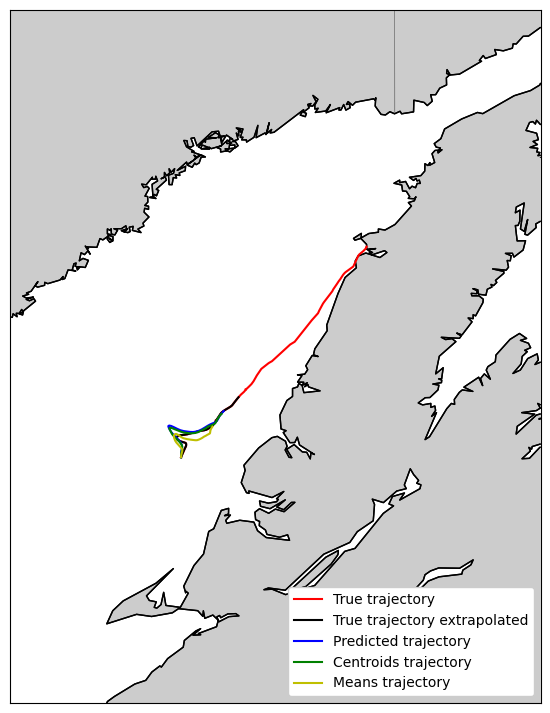

In [3]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -71, urcrnrlon = -63, resolution = 'i') #august2015
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 48, urcrnrlat = 52, llcrnrlon = -60, urcrnrlon = -56, resolution = 'i') #july2014
#m = Basemap(projection = 'mill', llcrnrlat = 46, urcrnrlat = 50, llcrnrlon = -65, urcrnrlon = -59, resolution = 'i') #oct2014

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()


# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.plot(true_lon,true_lat,latlon=True,linewidth=1.5,color='r', label='True trajectory')
m.plot(true_lon_extrapolated, true_lat_extrapolated,latlon=True,linewidth=1.5,color='k', label='True trajectory extrapolated')
m.plot(longitudes,latitudes,latlon=True,linewidth=1.5,color='b', label='Predicted trajectory')
m.plot( centroids_lons, centroids_lats,latlon=True,linewidth=1.5,color='g', label='Centroids trajectory')
m.plot(means_lons, means_lats,latlon=True,linewidth=1.5,color='y', label='Means trajectory')



plt.legend(loc = 'lower right',framealpha=1)
plt.show()


In [6]:
centroids_lon

array([-58.7106    ,   0.        , -58.70597609, -58.70597609,
       -58.70597609, -58.70597609, -58.70597609, -58.70597609,
       -58.70597609, -58.72471558, -58.74345507, -58.76219456,
       -58.76219456, -58.78093404, -58.78093404, -58.79967353,
       -58.78093404, -58.76219456, -58.74345507, -58.72471558,
       -58.70597609, -58.68723661, -58.66849712, -58.64975763,
       -58.61227866, -58.59353917, -58.57479968, -58.55606019,
       -58.53732071, -58.51858122, -58.51858122, -58.49984173,
       -58.48110224, -58.48110224, -58.46236276, -58.46236276,
       -58.46236276, -58.44362327, -58.44362327, -58.44362327,
       -58.42488378, -58.40614429, -58.40614429, -58.38740481,
       -58.36866532, -58.34992583, -58.33118634, -58.31244686,
       -58.29370737, -58.27496788, -58.2562284 , -58.2562284 ,
       -58.23748891, -58.23748891, -58.23748891, -58.21874942,
       -58.21874942, -58.20000993, -58.18127045, -58.16253096,
       -58.16253096, -58.14379147, -58.12505198, -58.10

In [4]:
type(nll)

numpy.ndarray